<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_classification_Exit_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier


## Importing the dataset







In [99]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [100]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


In [101]:
dataset['Exit Type']

0      Merger/Acquisition
1      Merger/Acquisition
2      Merger/Acquisition
3      Merger/Acquisition
4      Merger/Acquisition
              ...        
300                   IPO
301                   IPO
302                   IPO
303                   IPO
304                   IPO
Name: Exit Type, Length: 305, dtype: object

Filling missing values of Target column MOIC

In [102]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string


In [ ]:
# dataset.dropna(subset = ["MOIC"], inplace=True) # Drop rows with no values from Target column

In [103]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Deal Type 3,305,100.000000
Implied EV,305,100.000000
Implied EV/EBITDA,305,100.000000
Implied EV/EBIT,305,100.000000
Implied EV/Net Income,305,100.000000
...,...,...
Raised to Date,24,7.868852
Total VC Capital Raised ($M)***,23,7.540984
CEO PBId,5,1.639344
Year Founded,5,1.639344


Drop Column which has missing values more than 5%

In [104]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 5,'index'])
dataset = dataset.drop(over30, axis = 1)

In [105]:
dataset

,Company PBID,Exit Date,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,Deal No.,Deal ID.1,Deal Date,Deal Type,Deal Class,Deal Status,Business Status,Financing Status,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company Country,Year Founded
0,155748-70,11/15/17,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,1,67911-49T,01-Jan-2015,Grant,Other,Completed,Generating Revenue,Corporation,US Dollars (USD),"Park City, UT",Americas,North America,Park City,United States,2014.0
1,155748-70,11/15/17,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,2,122433-04T,26-May-2015,Early Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"Park City, UT",Americas,North America,Park City,United States,2014.0
2,160695-55,1/13/17,Merger/Acquisition,Early Stage VC,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,1,71323-57T,18-Mar-2016,Early Stage VC,Venture Capital,Completed,Product In Beta Test,Venture Capital-Backed,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,Israel,2015.0
3,81857-08,3/18/19,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,1,46035-10T,19-Feb-2015,Early Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,United States,2013.0
4,168816-52,8/16/17,Merger/Acquisition,Seed Round,Information Technology,Software,Application Software,"Mobile, Artificial Intelligence & Machine Lear...",Minsk,Belarus,79613-20T,168816-52,Information Technology,Software,Application Software,Application Software*,"Artificial Intelligence & Machine Learning, Cl...","online photo editor, photo editing application...",Formerly VC-backed,Startup,Venture Capital,84707-83P,1,79613-20T,08-Dec-2016,Seed Round,Venture Capital,Completed,Startup,Venture Capital-Backed,US Dollars (USD),"Minsk, Belarus",Europe,Eastern Europe,Minsk,Belarus,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,431327-53,8/8/16,IPO,Later Stage VC,Information Technology,Software,Business/Productivity Software,"CloudTech & DevOps, TMT, Supply Chain Tech",Shanghai,China,134492-14T,431327-53,Information Technology,Soft

In [106]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',		'Company Country'])




In [107]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Financing Status','Exit Date','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Class','Deal Status','CEO PBId'])





In [108]:
dataset

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Deal Type,Business Status,Native Currency of Deal,Year Founded
0,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Grant,Generating Revenue,US Dollars (USD),2014.0
1,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Generating Revenue,US Dollars (USD),2014.0
2,Merger/Acquisition,Early Stage VC,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,Israel,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Product In Beta Test,US Dollars (USD),2015.0
3,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Generating Revenue,US Dollars (USD),2013.0
4,Merger/Acquisition,Seed Round,Information Technology,Software,Application Software,"Mobile, Artificial Intelligence & Machine Lear...",Minsk,Belarus,Formerly VC-backed,Startup,Venture Capital,Seed Round,Startup,US Dollars (USD),2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,IPO,Later Stage VC,Information Technology,Software,Business/Productivity Software,"CloudTech & DevOps, TMT, Supply Chain Tech",Shanghai,China,Venture Capital-Backed,Generating Revenue,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,Chinese Yuan RMB (CNY),2001.0
301,IPO,Later Stage VC,Information Technology,Software,Business/Productivity Software,"CloudTech & DevOps, TMT, Supply Chain Tech",Shanghai,China,Venture Capital-Backed,Generating Revenue,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,Chinese Yuan RMB (CNY),2001.0
302,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",Later Stage VC,Profitable,Chinese Yuan RMB (CNY),2008.0
303,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,US Dollars (USD),2011.0


In [109]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

0       7.0
1       7.0
2       6.0
3       8.0
4       5.0
       ... 
300    20.0
301    20.0
302    13.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 305, dtype: float64

## Filling Missing Values

In [110]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Total duration for Company,5,1.639344


In [111]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [112]:
dataset.dropna(subset = ["Exit Type"], inplace=True)

In [113]:
dataset

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Deal Type,Business Status,Native Currency of Deal,Total duration for Company
0,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Grant,Generating Revenue,US Dollars (USD),7.0
1,Merger/Acquisition,Early Stage VC,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Generating Revenue,US Dollars (USD),7.0
2,Merger/Acquisition,Early Stage VC,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,Israel,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Product In Beta Test,US Dollars (USD),6.0
3,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,Formerly VC-backed,Generating Revenue,Venture Capital,Early Stage VC,Generating Revenue,US Dollars (USD),8.0
4,Merger/Acquisition,Seed Round,Information Technology,Software,Application Software,"Mobile, Artificial Intelligence & Machine Lear...",Minsk,Belarus,Formerly VC-backed,Startup,Venture Capital,Seed Round,Startup,US Dollars (USD),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,IPO,Later Stage VC,Information Technology,Software,Business/Productivity Software,"CloudTech & DevOps, TMT, Supply Chain Tech",Shanghai,China,Venture Capital-Backed,Generating Revenue,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,Chinese Yuan RMB (CNY),20.0
301,IPO,Later Stage VC,Information Technology,Software,Business/Productivity Software,"CloudTech & DevOps, TMT, Supply Chain Tech",Shanghai,China,Venture Capital-Backed,Generating Revenue,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,Chinese Yuan RMB (CNY),20.0
302,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",Later Stage VC,Profitable,Chinese Yuan RMB (CNY),13.0
303,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",Later Stage VC,Generating Revenue,US Dollars (USD),10.0


## Encoding categorical data

Label Encoding of Categorical Variable

In [114]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

dataset["Exit Type"]=le.fit_transform(dataset["Exit Type"])


#dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset['Last VC Deal Type'] = le.fit_transform(dataset['Last VC Deal Type'])

dataset['Industry Sector'] = le.fit_transform(dataset['Industry Sector'])

dataset['Industry Group'] = le.fit_transform(dataset['Industry Group'])

dataset['Industry Code'] = le.fit_transform(dataset['Industry Code'])

dataset['Verticals_x'] = le.fit_transform(dataset['Verticals_x'])

dataset['City'] = le.fit_transform(dataset['City'])

dataset['Country'] = le.fit_transform(dataset['Country'])

dataset['Current Financing Status'] = le.fit_transform(dataset['Current Financing Status'])
dataset['Current Business Status'] = le.fit_transform(dataset['Current Business Status'])
dataset['Universe'] = le.fit_transform(dataset['Universe'])
dataset['Business Status'] = le.fit_transform(dataset['Business Status'])
dataset['Native Currency of Deal'] = le.fit_transform(dataset['Native Currency of Deal'])
dataset['Deal Type'] = le.fit_transform(dataset['Deal Type'])
dataset[''] = le.fit_transform(dataset['Deal Type'])


dataset

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Deal Type,Business Status,Native Currency of Deal,Total duration for Company,
0,2,1,4,9,21,0,47,16,2,0,10,4,0,8,7.0,4
1,2,1,4,9,21,0,47,16,2,0,10,2,0,8,7.0,2
2,2,1,4,9,23,53,66,10,2,0,10,2,3,8,6.0,2
3,2,1,4,9,2,39,27,16,2,0,10,2,0,8,8.0,2
4,2,3,4,9,0,24,41,1,2,4,10,6,5,8,5.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1,2,4,9,2,12,62,4,5,0,9,5,0,1,20.0,5
301,1,2,4,9,2,12,62,4,5,0,9,5,0,1,20.0,5
302,1,0,4,2,4,22,5,4,2,3,9,5,4,1,13.0,5
303,1,12,4,9,3,51,57,16,2,3,9,5,0,8,10.0,5


Changing Data type of Column to perform correlation matrix

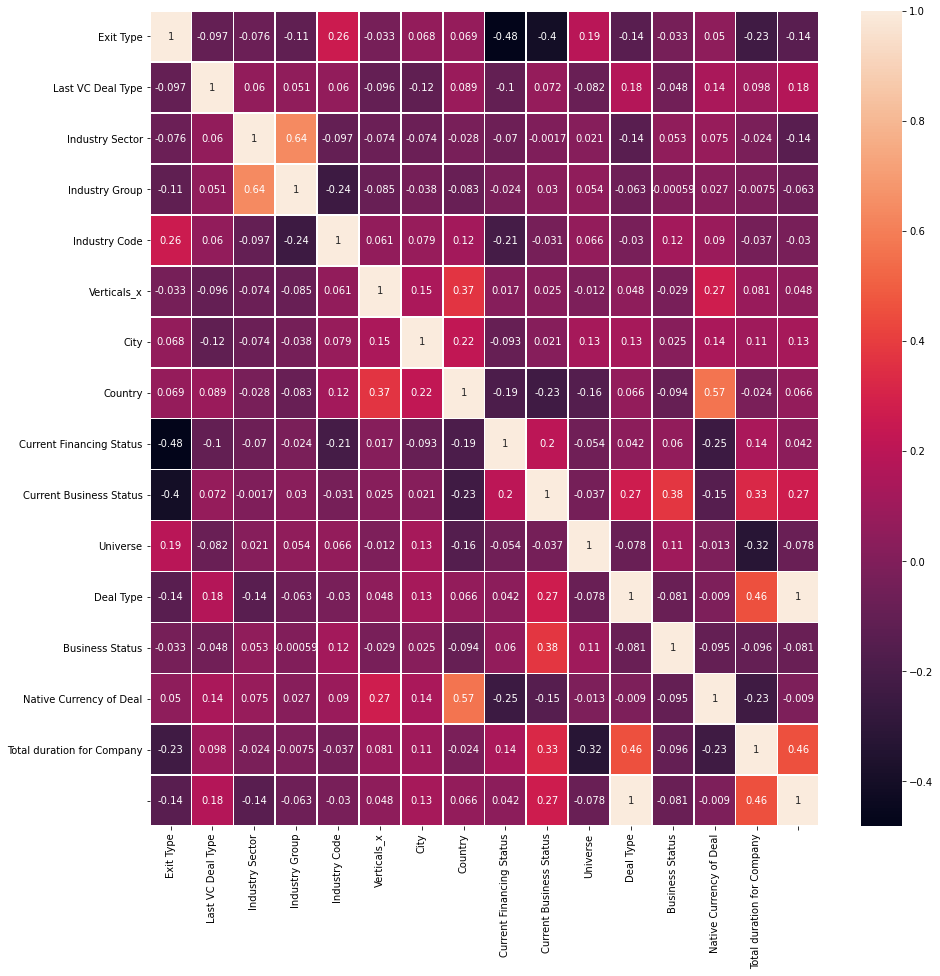

In [115]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

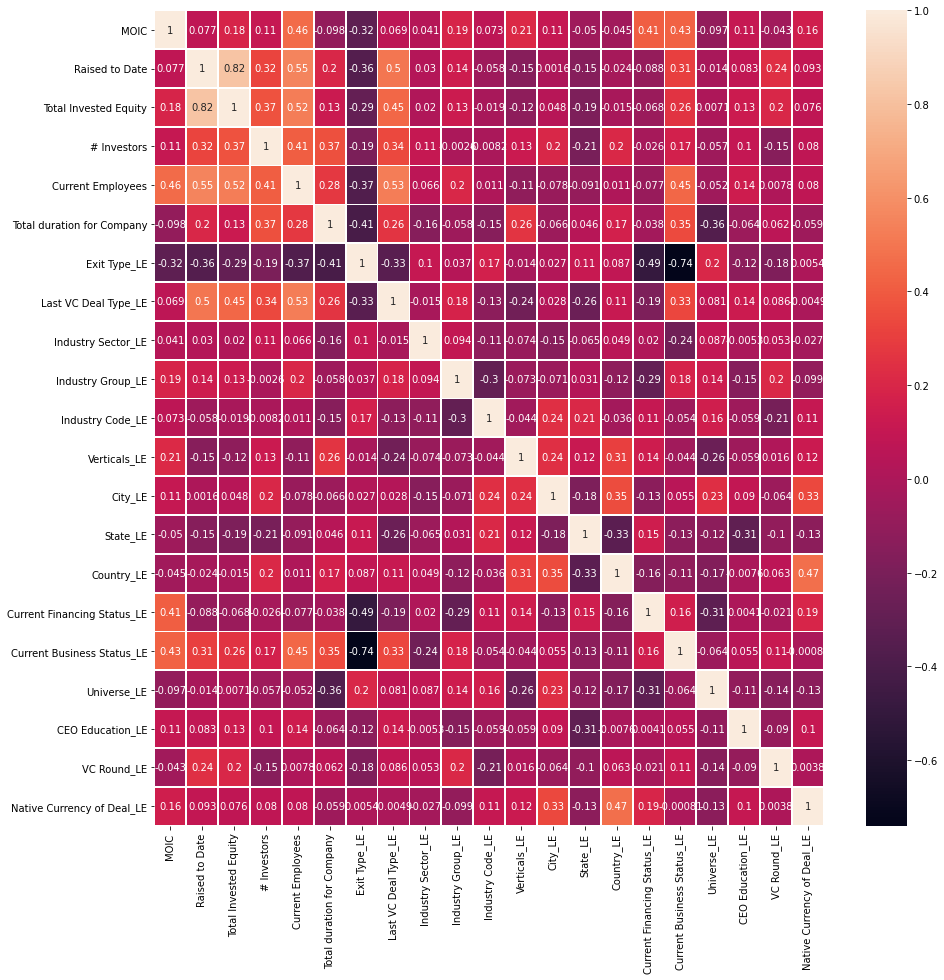

In [ ]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [116]:
X = dataset.loc[:,dataset.columns!='Exit Type']
Y = dataset[['Exit Type']]

In [117]:
X

,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Deal Type,Business Status,Native Currency of Deal,Total duration for Company,
0,1,4,9,21,0,47,16,2,0,10,4,0,8,7.0,4
1,1,4,9,21,0,47,16,2,0,10,2,0,8,7.0,2
2,1,4,9,23,53,66,10,2,0,10,2,3,8,6.0,2
3,1,4,9,2,39,27,16,2,0,10,2,0,8,8.0,2
4,3,4,9,0,24,41,1,2,4,10,6,5,8,5.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2,4,9,2,12,62,4,5,0,9,5,0,1,20.0,5
301,2,4,9,2,12,62,4,5,0,9,5,0,1,20.0,5
302,0,4,2,4,22,5,4,2,3,9,5,4,1,13.0,5
303,12,4,9,3,51,57,16,2,3,9,5,0,8,10.0,5


In [118]:
Y

,Exit Type
0,2
1,2
2,2
3,2
4,2
...,...
300,1
301,1
302,1
303,1


## Splitting the dataset into the Training set and Test set

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [120]:
print(y_train)

     Exit Type
62           2
187          2
111          2
157          2
108          2
..         ...
203          2
255          2
72           0
235          2
37           2

[244 rows x 1 columns]


In [85]:
print(y_test)

     Exit Type
207          1
191          2
222          2
177          2
260          2
..         ...
0            2
127          1
229          0
182          2
110          0

[61 rows x 1 columns]


In [86]:
print(X_train)

     Last VC Deal Type  ...  Total duration for Company
62                   3  ...                         7.0
187                  3  ...                         6.0
111                  1  ...                         8.0
157                  5  ...                         6.0
108                  8  ...                         8.0
..                 ...  ...                         ...
203                  3  ...                         7.0
255                  8  ...                         7.0
72                   2  ...                        11.0
235                 14  ...                        12.0
37                   3  ...                         9.0

[244 rows x 15 columns]


In [87]:
print(X_test)

     Last VC Deal Type  ...  Total duration for Company
207                 13  ...                         9.0
191                  2  ...                        14.0
222                  8  ...                         6.0
177                  1  ...                         7.0
260                  1  ...                         7.0
..                 ...  ...                         ...
0                    1  ...                         7.0
127                  2  ...                        14.0
229                  1  ...                         7.0
182                  8  ...                         8.0
110                  2  ...                        17.0

[61 rows x 15 columns]


Defining Function for Model Performance evaluation

### Building Models

In [132]:
def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y_train, y_predtrain)
    print(f'training data accuracy {train_accuracy}')
    #train_roc_auc = roc_auc_score(y_train, y_predtrain) 
    #print(f' Area under the ROC curve for training data {train_roc_auc}')
    
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'testing data accuracy {test_accuracy}')
    #test_roc_auc = roc_auc_score(y_test, y_predtest) 
    #print(f' Area under the ROC curve for testing data {test_roc_auc}')
    
    print(classification_report(y_test,y_predtest,digits=5))
    #plot_confusion_matrix(model_name, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    #plot_roc_curve(model_name, X_test, y_test)

In [ ]:
# Hyperparameter Tuning


n_estimators_hyp = [100,200,300,400,500,700,1000]
min_sample_leaf_hyp = np.linspace(1,20, 20);

oobscore_list=dict()

for i in n_estimators_hyp:
    for j in min_sample_leaf_hyp:
        rf_model = RandomForestClassifier(n_estimators=i, min_samples_leaf=int(j), oob_score=True);
        rf_model.fit(X_train, y_train)
        key = "n_estimator =" +str(i)+" min_sample_leaf ="+str(j);
        oobscore_list[key]=rf_model.oob_score_

    #oobscore_list.append(rf_model.oob_score_)

oobscore_list

In [129]:
# building model from parameters choosen from hyperparameter tuning


rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.9631


In [130]:
y_predtrain = rf.predict(X_train)
y_predtest = rf.predict(X_test)

pr1=pd.DataFrame(y_predtest,columns=["Pred"])

pr1["Actual"]=y_test.values

print(f"{pr1}")

    Pred  Actual
0      1       1
1      2       2
2      2       2
3      2       2
4      2       2
..   ...     ...
56     2       2
57     1       1
58     0       0
59     2       2
60     0       0

[61 rows x 2 columns]


In [133]:
## evaluating model performance 

eval_result(rf,y_train,y_predtrain,y_test,y_predtest)

training data accuracy 0.9918032786885246
testing data accuracy 0.9836065573770492
              precision    recall  f1-score   support

           0    1.00000   0.85714   0.92308         7
           1    1.00000   1.00000   1.00000        11
           2    0.97727   1.00000   0.98851        43

    accuracy                        0.98361        61
   macro avg    0.99242   0.95238   0.97053        61
weighted avg    0.98398   0.98361   0.98307        61

